# Linear Perceptron

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the datasets

In [2]:
df1 = pd.read_csv('dataset_LP_1.txt', header = None)
df2 = pd.read_csv('dataset_LP_2.csv', header = None)

# Adding bias column
df1.insert(0, 'bias', 1)
df2.insert(0, 'bias', 1)
print(df1)

      bias        0         1        2        3  4
0        1  3.62160   8.66610  -2.8073 -0.44699  0
1        1  4.54590   8.16740  -2.4586 -1.46210  0
2        1  3.86600  -2.63830   1.9242  0.10645  0
3        1  3.45660   9.52280  -4.0112 -3.59440  0
4        1  0.32924  -4.45520   4.5718 -0.98880  0
...    ...      ...       ...      ...      ... ..
1367     1  0.40614   1.34920  -1.4501 -0.55949  1
1368     1 -1.38870  -4.87730   6.4774  0.34179  1
1369     1 -3.75030 -13.45860  17.5932 -2.77710  1
1370     1 -3.56370  -8.38270  12.3930 -1.28230  1
1371     1 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 6 columns]


## Utility Functions

In [3]:
# Function to split dataset into training and testing parts
def split(dataframe, ratio = 0.7):
    df_train = dataframe.sample(frac = ratio)
    df_test = dataframe.drop(df_train.index)

    train = df_train.to_numpy()
    test = df_test.to_numpy()

    X_train = train[:, :-1].reshape((-1, train.shape[1]-1))
    Y_train = train[:, -1].reshape((-1, 1))
    X_test = test[:, :-1].reshape((-1, test.shape[1]-1))
    Y_test = test[:, -1].reshape((-1, 1))

    return X_train, Y_train, X_test, Y_test

In [4]:
# Function to calculate model accuracy
def calc_accuracy(actual, predicted):
    correct = 0
    for a, b in zip(actual, predicted):
        if a == b:
            correct += 1
    return float(correct) / len(actual) * 100.0

## Creating Perceptron class for model

In [5]:
class Perceptron:
    def __init__(self):
        self.w = None
    
    # Predicts the class for one datapoint
    def model(self, X):
        return 1 if np.matmul(X, self.w) >= 0 else 0
    
    # Predicts the class for dataset
    def predict(self, X):
        Y = [self.model(x) for x in X]
        return np.array(Y).reshape((-1, 1))

    # Function for training the model
    def fit(self, X, Y, epochs = 1, alpha = 0.1):
        self.w = np.zeros(X.shape[1]).reshape((-1, 1))
        print(f'\nIntial w: {self.w.T}')
        accuracy = {}
        max_accuracy = 0
        max_weight = None
        wt_matrix = []
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                x = x.reshape((1, -1))
                y = y.flatten()[0]
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + alpha * x.T
                elif y == 0 and y_pred == 1:
                    self.w = self.w - alpha * x.T

            wt_matrix.append(self.w)
            accuracy[i] = calc_accuracy(self.predict(X), Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                max_weight = self.w
                
        self.w = max_weight
        
        print(f'Max training Accuracy found: {max_accuracy}')
        plt.figure(figsize = (10, 10))
        plt.plot(list(accuracy.keys()), list(accuracy.values()))
        plt.xlabel("Epoch Number")
        plt.ylabel("Accuracy")

        return self.w

## Applying the functions


Intial w: [[0. 0. 0. 0. 0.]]
Max training Accuracy found: 99.47916666666666

Intial w: [[0. 0. 0. 0.]]
Max training Accuracy found: 100.0

Testing accuracy for dataset 1: 98.30097087378641
Best W found for dataset 1: [[ 0.75       -0.75311072 -0.50832742 -0.58391263 -0.11062852]]

Testing accuracy for dataset 2: 100.0
Best W found for dataset 2: [[ 0.05       -0.00574477  0.01749253  0.16859539]]


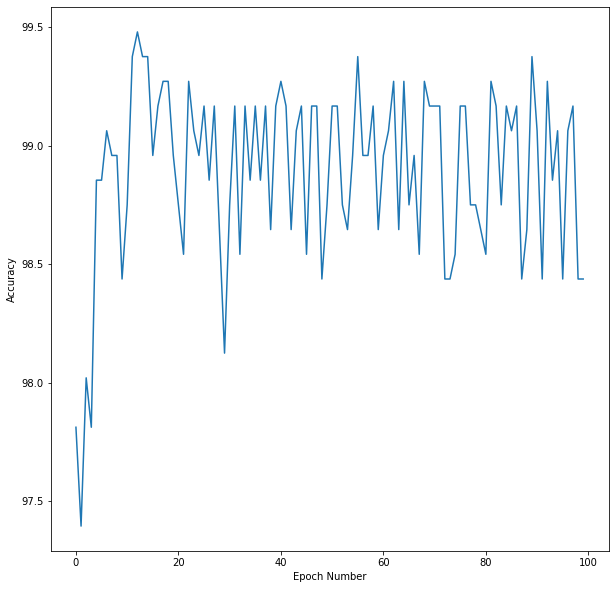

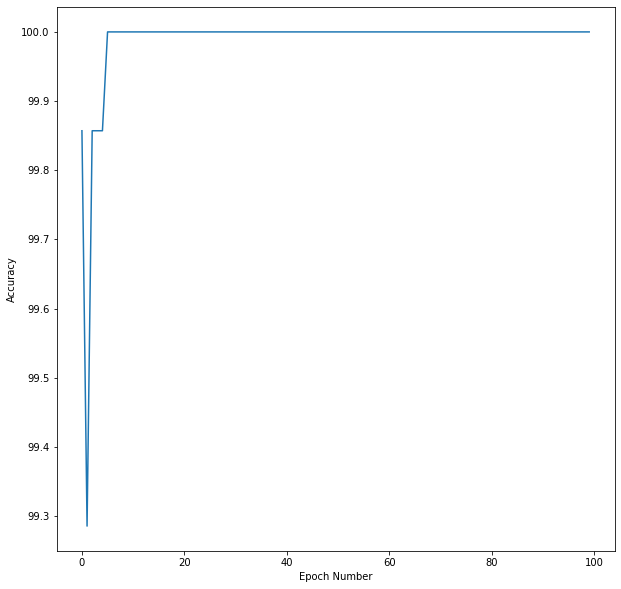

In [6]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = split(df1, ratio = 0.7)
X_train_2, Y_train_2, X_test_2, Y_test_2 = split(df2, ratio = 0.7)

perceptron1 = Perceptron()
perceptron2 = Perceptron()

wt_matrix_1 = perceptron1.fit(X_train_1, Y_train_1, epochs = 100, alpha = 0.01)
Y_pred_test_1 = perceptron1.predict(X_test_1)

wt_matrix_2 = perceptron2.fit(X_train_2, Y_train_2, epochs = 100, alpha = 0.01)
Y_pred_test_2 = perceptron2.predict(X_test_2)

print(f'\nTesting accuracy for dataset 1: {calc_accuracy(Y_pred_test_1, Y_test_1)}')
print(f'Best W found for dataset 1: {wt_matrix_1.T}')

print(f'\nTesting accuracy for dataset 2: {calc_accuracy(Y_pred_test_2, Y_test_2)}')
print(f'Best W found for dataset 2: {wt_matrix_2.T}')